# Custom Model Creation

In [1]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np

data = []
labels = []

# Load images
for label, category in enumerate(['with_mask', 'without_mask']):
    folder = os.path.join('data', category)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Resizing image to 128x128
        data.append(img)
        labels.append(label)

data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

## Using Sequential Model

In [ ]:
# Importing libraries
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Load images and labels
data = []
labels = []

for label, category in enumerate(['with_mask', 'without_mask']):
    folder = os.path.join('data', category)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Resize to 128x128
        data.append(img)
        labels.append(label)

data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

# Enhanced model
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth convolutional block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(2, activation='softmax')  # Output: 2 classes (with_mask, without_mask)
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [4]:

# Training the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=15,  
    shuffle=True
)


Epoch 1/15
192/192 [==============================] - 115s 582ms/step - loss: 0.4480 - accuracy: 0.8197 - val_loss: 1.4446 - val_accuracy: 0.5103
Epoch 2/15
192/192 [==============================] - 60s 310ms/step - loss: 0.2597 - accuracy: 0.8960 - val_loss: 0.3592 - val_accuracy: 0.8632
Epoch 3/15
192/192 [==============================] - 64s 331ms/step - loss: 0.2091 - accuracy: 0.9153 - val_loss: 0.1428 - val_accuracy: 0.9426
Epoch 4/15
192/192 [==============================] - 66s 343ms/step - loss: 0.1794 - accuracy: 0.9308 - val_loss: 0.1658 - val_accuracy: 0.9397
Epoch 5/15
192/192 [==============================] - 66s 342ms/step - loss: 0.1374 - accuracy: 0.9488 - val_loss: 0.1793 - val_accuracy: 0.9426
Epoch 6/15
192/192 [==============================] - 67s 348ms/step - loss: 0.1724 - accuracy: 0.9354 - val_loss: 0.0968 - val_accuracy: 0.9647
Epoch 7/15
192/192 [==============================] - 66s 346ms/step - loss: 0.1110 - accuracy: 0.9606 - val_loss: 0.1288 - val_a

In [5]:

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


24/24 [==============================] - 2s 84ms/step - loss: 0.0858 - accuracy: 0.9696
Test Accuracy: 96.96%


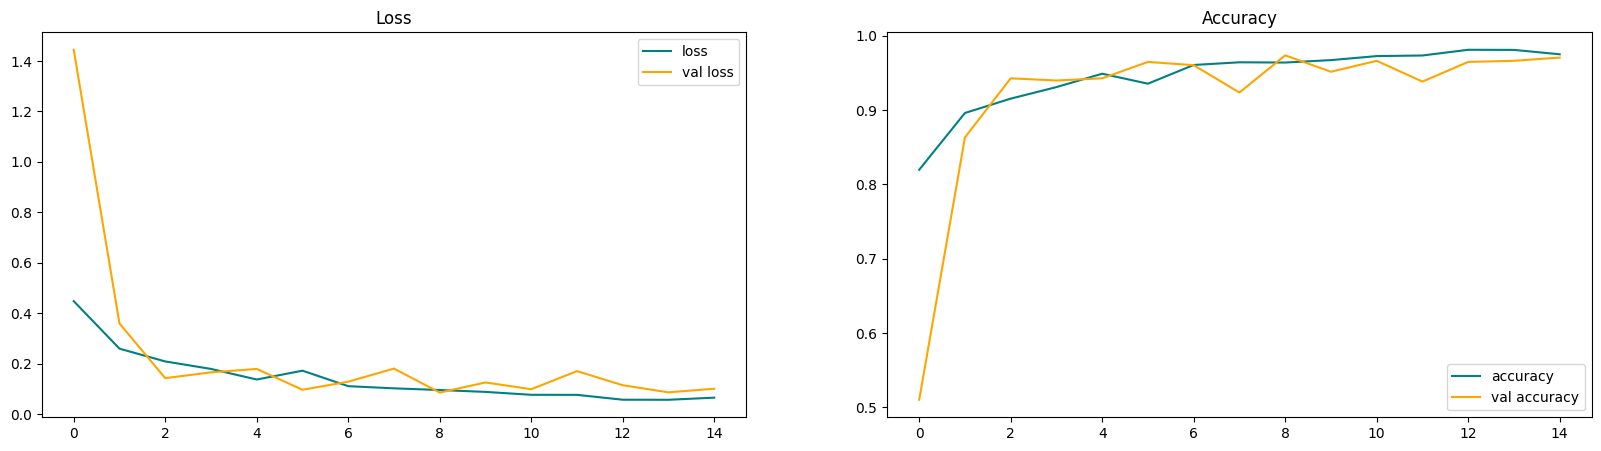

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='loss')
ax[0].plot(history.history['val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(history.history['val_accuracy'], color='orange', label='val accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend()


plt.show()

In [7]:
model.save("custom_face_mask_model.h5")

d:\Softwares\Python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Using MobileNet 

In [9]:
from keras.applications import MobileNet
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Activation
from keras.models import Model

# MobileNet with pre-trained imagenet weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freezing the base model layers
base_model.trainable = False

# Custom layers for face mask classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions

x = Dense(512)(x)  # Dense layer with 512 neurons
x = BatchNormalization()(x)  # Batch normalization for stable training
x = Activation('relu')(x)  # Activation function
x = Dropout(0.5)(x)  # Dropout for regularization

x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.4)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)

predictions = Dense(2, activation='softmax')(x)  # Output layer with softmax activation for 2 classes

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 5214 images belonging to 2 classes.
Found 1118 images belonging to 2 classes.
Found 1118 images belonging to 2 classes.


In [11]:
model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


Epoch 1/15
 66/163 [===========>..................] - ETA: 48s - loss: 0.1710 - accuracy: 0.9252

d:\Softwares\Python\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


163/163 [==============================] - 113s 675ms/step - loss: 0.1045 - accuracy: 0.9576 - val_loss: 0.0336 - val_accuracy: 0.9902
Epoch 2/15
163/163 [==============================] - 44s 266ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0226 - val_accuracy: 0.9902
Epoch 3/15
163/163 [==============================] - 43s 264ms/step - loss: 0.0377 - accuracy: 0.9854 - val_loss: 0.0303 - val_accuracy: 0.9875
Epoch 4/15
163/163 [==============================] - 45s 276ms/step - loss: 0.0276 - accuracy: 0.9900 - val_loss: 0.0150 - val_accuracy: 0.9919
Epoch 5/15
163/163 [==============================] - 77s 472ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0236 - val_accuracy: 0.9911
Epoch 6/15
163/163 [==============================] - 76s 465ms/step - loss: 0.0205 - accuracy: 0.9921 - val_loss: 0.0220 - val_accuracy: 0.9875
Epoch 7/15
163/163 [==============================] - 76s 465ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0153 - val_accuracy: 0.

In [14]:
# Evaluating the model

loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

# Print evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


35/35 [==============================] - 5s 150ms/step - loss: 0.0349 - accuracy: 0.9919
Test Loss: 0.0349
Test Accuracy: 99.19%


In [17]:
model.save("mobilenet_face_mask_model.h5")

d:\Softwares\Python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Using VGG16

In [18]:
import os
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


base_dir = 'DATASET'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Val')
test_dir = os.path.join(base_dir, 'Test')

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Loading the VGG16 model on imagenet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freezing the base model layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

# Custom layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')  # Binary output (Mask/No Mask)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Found 5214 images belonging to 2 classes.
Found 1118 images belonging to 2 classes.
Found 1118 images belonging to 2 classes.


In [19]:

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_13 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)              

In [20]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
 29/162 [====>.........................] - ETA: 3:13 - loss: 0.4998 - accuracy: 0.7532

d:\Softwares\Python\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


162/162 [==============================] - 217s 1s/step - loss: 0.3155 - accuracy: 0.8585 - val_loss: 0.2201 - val_accuracy: 0.9228
Epoch 2/20
162/162 [==============================] - 300s 2s/step - loss: 0.2166 - accuracy: 0.9097 - val_loss: 0.1811 - val_accuracy: 0.9210
Epoch 3/20
162/162 [==============================] - 304s 2s/step - loss: 0.1966 - accuracy: 0.9211 - val_loss: 0.1857 - val_accuracy: 0.9200
Epoch 4/20
162/162 [==============================] - 305s 2s/step - loss: 0.1746 - accuracy: 0.9311 - val_loss: 0.1157 - val_accuracy: 0.9513
Epoch 5/20
162/162 [==============================] - 304s 2s/step - loss: 0.1660 - accuracy: 0.9313 - val_loss: 0.1537 - val_accuracy: 0.9430
Epoch 6/20
162/162 [==============================] - 208s 1s/step - loss: 0.1566 - accuracy: 0.9415 - val_loss: 0.1096 - val_accuracy: 0.9540
Epoch 7/20
162/162 [==============================] - 256s 2s/step - loss: 0.1596 - accuracy: 0.9386 - val_loss: 0.1315 - val_accuracy: 0.9504
Epoch 8/20

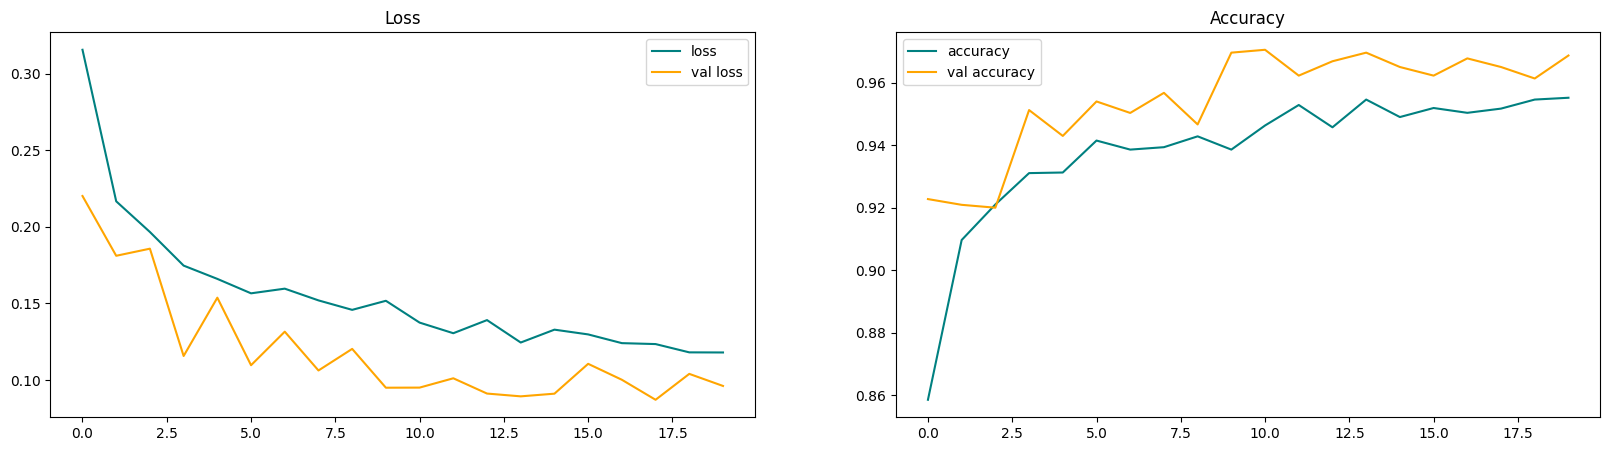

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='loss')
ax[0].plot(history.history['val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(history.history['val_accuracy'], color='orange', label='val accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend()


plt.show()

In [21]:

# Evaluating the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


34/34 [==============================] - 32s 932ms/step - loss: 0.0779 - accuracy: 0.9715
Test Accuracy: 97.15%


In [22]:
model.save("vgg16_face_mask_model.h5")

## Using ResNet50

In [24]:
import os
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


base_dir = 'DATASET'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Val')
test_dir = os.path.join(base_dir, 'Test')


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Loading the ResNet50 model with imagenet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freezing the base modellayers
for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),


    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),


    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),


    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')  # Binary output (Mask/No Mask)
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Found 5214 images belonging to 2 classes.
Found 1118 images belonging to 2 classes.
Found 1118 images belonging to 2 classes.


In [25]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_16 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_12 (Dropout)        (None, 512)              

In [26]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
162/162 [==============================] - 88s 515ms/step - loss: 0.7006 - accuracy: 0.5984 - val_loss: 0.7125 - val_accuracy: 0.5018
Epoch 2/20
162/162 [==============================] - 94s 583ms/step - loss: 0.6551 - accuracy: 0.6295 - val_loss: 0.6906 - val_accuracy: 0.5634
Epoch 3/20
162/162 [==============================] - 99s 614ms/step - loss: 0.6301 - accuracy: 0.6567 - val_loss: 0.6724 - val_accuracy: 0.5570
Epoch 4/20
162/162 [==============================] - 111s 688ms/step - loss: 0.6136 - accuracy: 0.6679 - val_loss: 0.7469 - val_accuracy: 0.5331
Epoch 5/20
162/162 [==============================] - 108s 664ms/step - loss: 0.6026 - accuracy: 0.6816 - val_loss: 0.6083 - val_accuracy: 0.6710
Epoch 6/20
162/162 [==============================] - 98s 602ms/step - loss: 0.5938 - accuracy: 0.6860 - val_loss: 0.7476 - val_accuracy: 0.6204
Epoch 7/20
162/162 [==============================] - 98s 604ms/step - loss: 0.5816 - accuracy: 0.6918 - val_loss: 0.7020 - val_

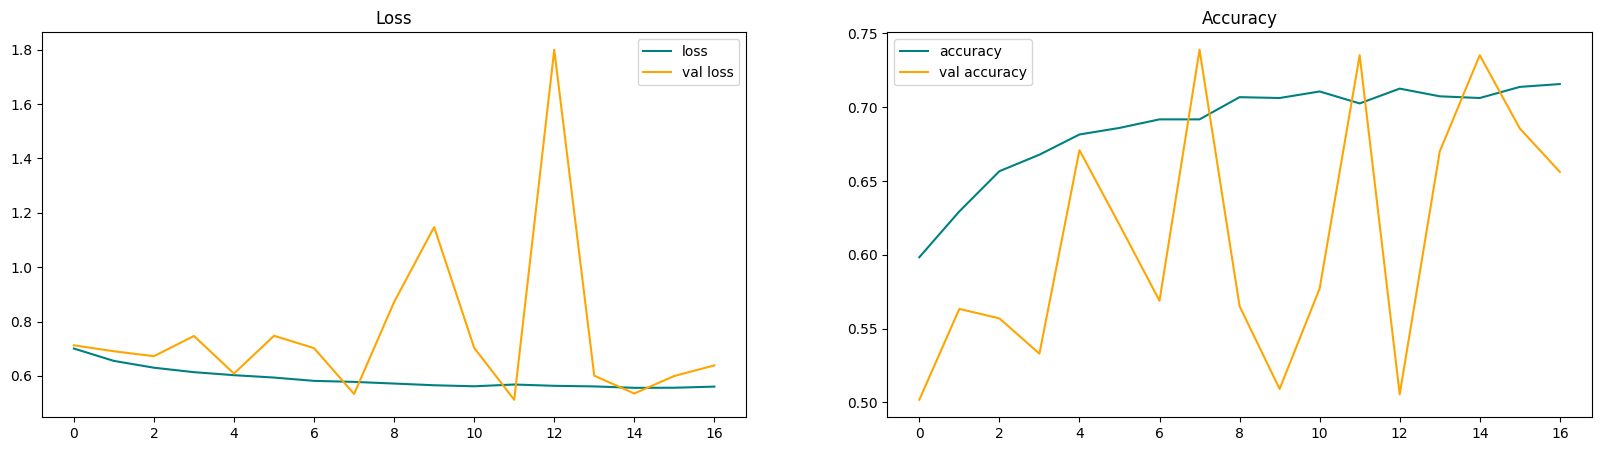

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='loss')
ax[0].plot(history.history['val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(history.history['val_accuracy'], color='orange', label='val accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend()


plt.show()

In [28]:

# Evaluating the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


34/34 [==============================] - 17s 502ms/step - loss: 0.4984 - accuracy: 0.7564
Test Accuracy: 75.64%


In [29]:
model.save("resnet50_face_mask_model.h5")